In [63]:
#imports
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

##sklearn learners
from sklearn.neighbors import KNeighborsRegressor

## scale the x variables when there is more than one
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

##sklearn metrics
from sklearn.metrics import mean_squared_error

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# model, train/test split, dummies (one-hot-encoding), rmse metric from scikit learn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error

## sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve

### sklearn model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor

import tensorflow as tf
import random

In [15]:
#read in the kinexon data and export it into a csv file
kinexon_excel_data = pd.read_excel ("/Users/alexburton/Downloads/Kinexon_Data_Dump.xlsx") 
  
# Write the dataframe object 
# into csv file 
kinexon_excel_data.to_csv ("Kinexon_Data_Dump.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
kinexon_csv_data = pd.DataFrame(pd.read_csv("Kinexon_Data_Dump.csv")) 
  
# show the dataframe 
kinexon_csv_data

,Name,Session ID,Session begin date (UTC),Time (hh:mm:ss),Position,Jumps,Total Workload,High Intensity Effort/Min,Jump Load / min (J),Jumps (very low),...,Exertions / min (high),Exertions / min (low),Exertions / min (medium),Exertions / min (very high),Jumps / min (high),Jumps / min (low),Jumps / min (medium),Jumps / min (very high),Jumps / min (very low),Duration (hh:mm:ss)
0,Jaden Ravnsborg,108,01/10/2023,00:56:00,Libero,38,182.14,3.25,109.69,3,...,0.00,0.00,0.00,0.04,0.00,0.57,0.05,0.00,0.05,NaN
1,Marta Levinska,108,01/10/2023,00:56:44,Outside Hitter,56,202.72,3.57,304.88,1,...,0.00,0.00,0.00,0.78,0.00,0.09,0.88,0.00,0.02,NaN
2,Shannon Shields,108,01/10/2023,00:56:44,Setter,66,245.92,4.33,273.67,5,...,0.00,0.00,0.00,0.26,0.00,0.51,0.56,0.00,0.09,NaN
3,Olivia Johnson,108,01/10/2023,00:55:02,Middle Blocker,19,200.64,3.64,69.15,3,...,0.00,0.00,0.00,0.07,0.00,0.09,0.20,0.00,0.05,NaN
4,Geli Cyr,108,01/10/2023,00:56:32,Outside Hitter,55,195.16,3.45,261.64,4,...,0.00,0.00,0.00,0.16,0.00,0.16,0.74,0.00,0.07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Marta Levinska,141,03/03/2023,02:15:34,Outside Hitter,190,675.86,4.98,410.22,30,...,0.14,0.09,0.58,0.00,0.51,0.07,0.46,0.15,0.22,02:16:03
271,Meadow Cooper,141,03/03/2023,02:15:34,Libero,74,662.76,4.89,111.07,3,...,0.07,0.09,0.30,0.00,0.04,0.07,0.37,0.04,0.02,02:16:03
272,Olivia Johnson,141,03/03/2023,02:15:34,Middle Blocker,160,580.47,4.28,286.24,2,...,0.07,0.07,0.55,0.00,0.36,0.25,0.55,0.01,0.01,02:16:03
273,Roberta Rabelo,141,03/03/2023,02:15:34,Outside Hitter,194,779.71,5.75,479.37,8,...,0.32,0.07,0.68,0.03,0.72,0.10,0.21,0.35,0.06,02:16:03


In [17]:
#read in the forceplate data and export it into a csv file
fplate_excel_data = pd.read_excel ("/Users/alexburton/Downloads/ASU_WVB_Force_Plate_Data_Dump.xlsx") 
  
# Write the dataframe object 
# into csv file 
fplate_excel_data.to_csv ("ASU_WVB_Force_Plate_Data_Dump.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
fplate_csv_data = pd.DataFrame(pd.read_csv("ASU_WVB_Force_Plate_Data_Dump.csv")) 
  
# show the dataframe 
fplate_csv_data

,TestId,Date,Time,Name,Segment,Position,Type,Excluded,Tags,System Weight,...,L|R Avg. Propulsive Force,L|R Avg. Braking RFD,L|R Braking Impulse Index,L|R Propulsive Impulse Index,Peak Landing Force,Relative Peak Landing Force,L|R Peak Landing Force,L|R Avg. Landing Force,L|R Landing Impulse Index,mRSI
0,GV84lJugfN7m5PSSrxm2,2023-02-27,08:45:18,MEADOW COOPER,NaN,Libero,Countermovement Jump,NaN,Pre-Training,558.512,...,-8.7868,-0.9494,-30.4760,-16.1678,2295,410.9133,8.2353,-19.1873,-32.2042,0.4312
1,9FvqzsPHF5DZyqk06QHP,2023-02-27,08:45:07,MEADOW COOPER,NaN,Libero,Countermovement Jump,NaN,Pre-Training,558.017,...,-6.1520,7.4753,-27.0407,-11.5911,1930,345.8676,-6.7358,-9.0155,NaN,0.4545
2,UAZxMA5mK5ASBO6suiZY,2023-02-27,08:44:56,MEADOW COOPER,NaN,Libero,Countermovement Jump,NaN,Pre-Training,558.858,...,-7.8486,-5.6146,-31.6148,-14.5600,2609,466.8449,-10.3871,-13.7625,-24.1846,0.4418
3,sOBgWvKH9rsSRWxCxRVN,2023-02-20,08:47:54,MEADOW COOPER,NaN,Libero,Countermovement Jump,NaN,Pre-Training,550.024,...,-6.3427,1.1696,-30.1241,-11.9213,1954,355.2572,1.7400,1.9548,3.8329,0.3915
4,y754BWYzYioeDzxRfsC7,2023-02-20,08:47:43,MEADOW COOPER,NaN,Libero,Countermovement Jump,NaN,Pre-Training,550.182,...,-3.5048,-5.0746,-24.9217,-6.8054,2393,434.9470,7.4802,-8.3895,-15.4756,0.4711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,6M3wV6AP5YCyLraCiGql,2022-08-15,12:57:03,SHANNON SHIELDS,NaN,Setter,Countermovement Jump,NaN,Pre-Training,788.545,...,-6.4711,0.3286,-20.3685,-12.1631,3578,453.7471,-3.9687,-7.5858,-14.1164,0.2879
606,CBD9IxbxXXlhy9rkzF3o,2022-08-15,12:56:53,SHANNON SHIELDS,NaN,Setter,Countermovement Jump,NaN,Pre-Training,786.942,...,-4.5312,-0.8230,-22.0617,-8.6874,3452,438.6600,-13.3256,-0.4627,NaN,0.3350
607,RVrZ6SFtOvZcvI0iCig8,2022-08-10,08:22:49,SHANNON SHIELDS,NaN,Setter,Countermovement Jump,NaN,Pre-Training,802.060,...,-1.9755,2.6022,-30.7946,-3.8961,2340,291.7487,-63.3333,-10.5264,-19.0591,0.2854
608,ksg6BhX9zLeOpQWhs57s,2022-08-10,08:22:41,SHANNON SHIELDS,NaN,Setter,Countermovement Jump,NaN,Pre-Training,799.911,...,-6.2942,5.1802,-30.3799,-11.8598,2826,353.2893,-2.9724,0.8127,1.6120,0.2931


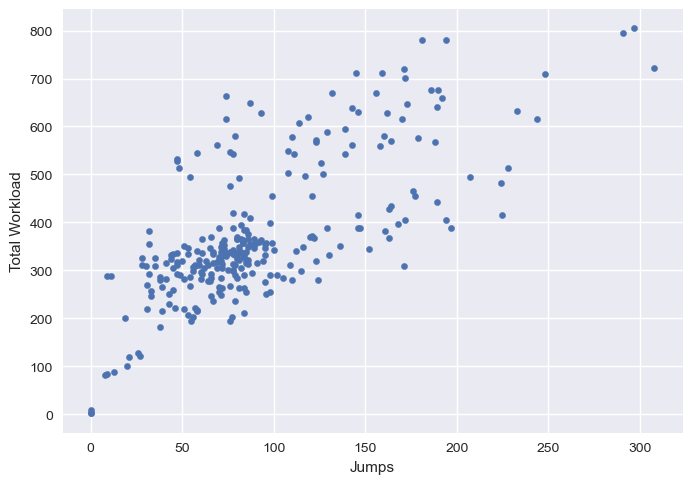

In [36]:
#knn for kinexon data
#graph number of jumps vs total workload
plt.scatter(kinexon_csv_data['Jumps'],kinexon_csv_data['Total Workload'], s=20)
plt.xlabel('Jumps'); plt.ylabel('Total Workload')
plt.show()

7

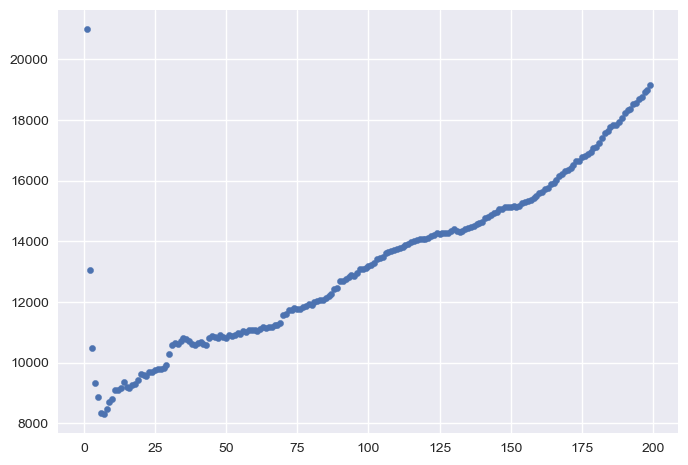

In [37]:
y = kinexon_csv_data['Total Workload']
x = kinexon_csv_data['Jumps'].to_numpy()[:,np.newaxis]

def MSE(k, Xtrain, Xtest, ytrain, ytest):
    # model object
    kmod = KNeighborsRegressor(n_neighbors=k)

    # fit on train
    kmod.fit(Xtrain,ytrain)

    # predict on test
    ypred = kmod.predict(Xtest)
    
    return mean_squared_error(ytest,ypred)

#find the MSE for each value of K
results = np.zeros(199)

for i in range(1, 200):
   results[i-1] = MSE(i, Xtrain, Xtest, ytrain, ytest)

#print out MSE for different values of k
x = np.arange(1,200)
plt.scatter(x, results, s=20)
x[np.argmin(results)]

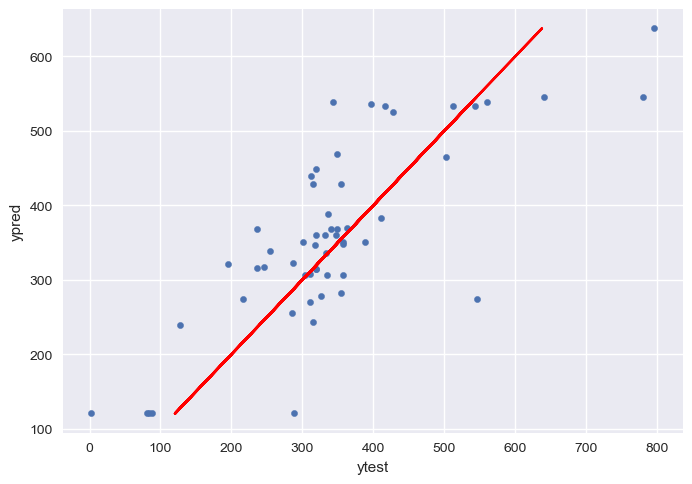

In [38]:
#KNN model using the optimal value of k

# model object
kmod = KNeighborsRegressor(n_neighbors=x[np.argmin(results)])

# fit on train
kmod.fit(Xtrain,ytrain)

# predict on test
ypred = kmod.predict(Xtest)

#plot to check predictions
plt.scatter(ytest,ypred, s=20)
plt.xlabel('ytest'); plt.ylabel('ypred')
plt.plot(ypred,ypred,c='red')

In [26]:
#Predict 
jumps = np.array([[57]])

# predict on test
ypred = kmod.predict(jumps)

ypred

array([270.74571429])

In [28]:
#5 fold cross validation to choose best k

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

myseed = 34
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)

clf = svm.SVC(kernel='linear', C=1).fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

kmod = KNeighborsRegressor()
parameters = {'n_neighbors':range(1,95)}
clf = GridSearchCV(kmod, parameters)

clf.fit(Xtrain, ytrain)

sorted(clf.cv_results_.keys())

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

report(clf.cv_results_)

Model with rank: 1
Mean validation score: 0.990 (std: 0.021)
Parameters: {'n_neighbors': 1}

Model with rank: 2
Mean validation score: 0.987 (std: 0.020)
Parameters: {'n_neighbors': 2}

Model with rank: 3
Mean validation score: 0.982 (std: 0.019)
Parameters: {'n_neighbors': 3}



val from fun: 20993.874992727273  and check val:  20993.874992727273


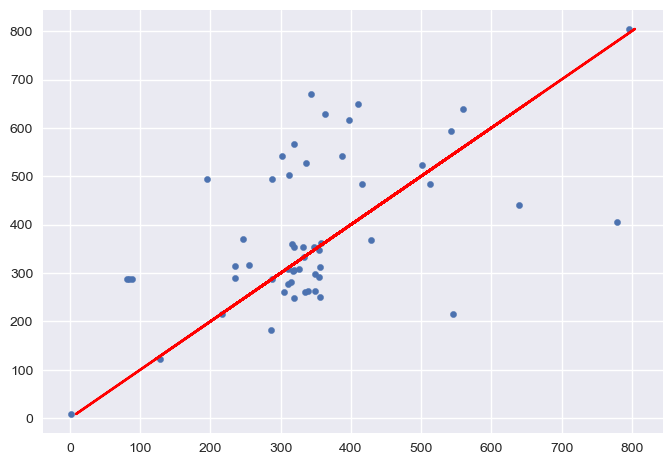

In [39]:
#Run KNN using the best k, k=1
y = kinexon_csv_data['Total Workload']
x = kinexon_csv_data['Jumps'].to_numpy()[:,np.newaxis]


myseed = 34
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,random_state=myseed, test_size=.2)

# model object
kmod = KNeighborsRegressor(n_neighbors=1)

# fit on train
kmod.fit(Xtrain,ytrain)

# predict on test
ypred = kmod.predict(Xtest)

#plot to check predictions
plt.scatter(ytest,ypred, s=20)
plt.plot(ypred,ypred,c='red')

#rmse
k50mse = mean_squared_error(ytest,ypred)

 
#check rmse
check  = np.sum((ypred-ytest)**2)/len(ytest)
print('val from fun:',k50mse,' and check val: ',check)

In [30]:
#Predict price for 57 jumps using KNN
jumps = np.array([[57]])

# predict on test
ypred = kmod.predict(jumps)

ypred

array([308.11])

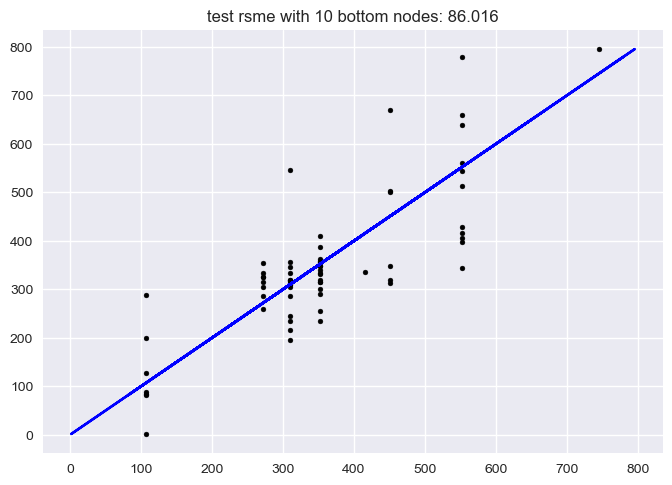

RMSE for decision tree:  0.10716187435388748
MAE for decision tree:  61.712404595658604


In [58]:
#Decision Tree for kinexon
kinexon_csv_copy = kinexon_csv_data[['Jumps','Total Workload']].copy()

x = kinexon_csv_copy['Jumps'].to_numpy()[:,np.newaxis]
y = kinexon_csv_copy['Total Workload']

### simple train/test split

myseed = 34
xtr, xte, ytr, yte = train_test_split(x,y,random_state=myseed, test_size=.25)

# tree with at most nbot bottom nodes
nbot = 10
tmod = DecisionTreeRegressor(max_leaf_nodes=nbot)
tmod.fit(xtr,ytr)

## look at in-sample fits
yhat = tmod.predict(xtr)
ypred = tmod.predict(xte)

rmse = math.sqrt(mean_squared_error(ypred,yte))

plt.scatter(ypred,yte,c='black',marker='.')
plt.plot(yte,yte,c='b')
plt.title(f'test rsme with {nbot} bottom nodes: {np.round(rmse,3)}')
plt.show()

#Fidn the max and min value to make the RMSE value normalized
# Find the maximum and minimum values in the 'Total Workload' column
max_value = y.max()
min_value = y.min()
diff = max_value - min_value

# NRMSE
nrmsedt = math.sqrt(mean_squared_error(yte, ypred)) / diff
print('RMSE for decision tree: ',nrmsedt)

# MAE
maedt = mean_absolute_error(yte, ypred)
print('MAE for decision tree: ',maedt)

In [70]:
#Predict price for 57 jumps using Decision Tree
jumps = np.array([[57]])

# predict on test
ypred = tmod.predict(jumps)

ypred

array([309.75288889])

oob score for Random Forests:  0.4427862039988273


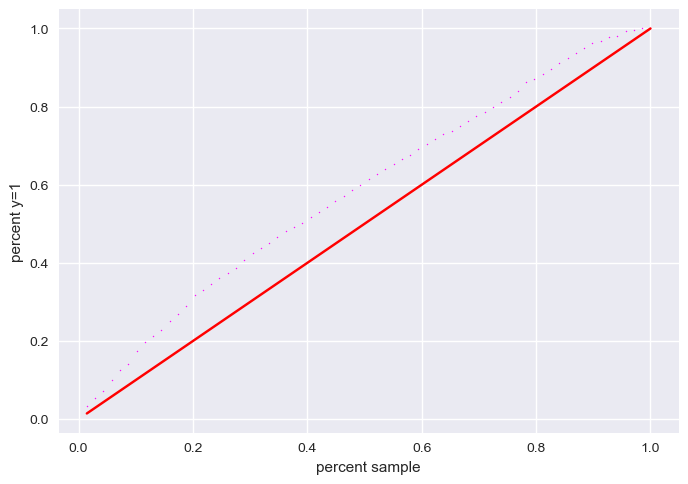

NRMSE for random forests:  0.11148005491537955
MAE for random forests:  69.19267275406114


In [60]:
#Random Forests for kinexon

## lift curve
def mylift(y,p):
   """lift"""
   ii = np.argsort(p)[::-1]
   ps = np.cumsum(y[ii])/np.sum(y)
   return(ps)

nte = len(yte)
pvec = np.linspace(1,nte,nte)/nte

# random forests
rf = RandomForestRegressor(random_state=0, n_estimators=500, max_features="auto", min_samples_split=20, oob_score=True)
rf.fit(xtr,ytr)
phrf = rf.predict(xte)

# the OOB score is computed as the coefficient of determination R^2 of the prediction.
# not too useful in this application
print("oob score for Random Forests: ",rf.oob_score_)

## out of sample lift
plt.scatter(pvec,mylift(yte.values,phrf),s=.5,c='magenta')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

# NRMSE
nrmserf = math.sqrt(mean_squared_error(yte, phrf)) / diff
print('NRMSE for random forests: ',nrmserf)

# MAE
maerf = mean_absolute_error(yte, phrf)
print('MAE for random forests: ',maerf)



In [71]:
#Predict price for 57 jumps using Random Forests
jumps = np.array([[57]])

# predict on test
ypred = rf.predict(jumps)

ypred

array([283.70171293])

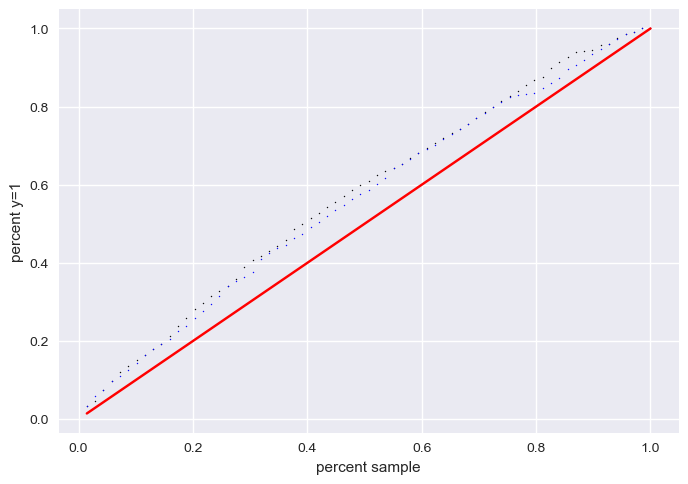

NRMSE for boosting:  0.13882797139140896
MAE for boosting:  76.77787505534978
NRMSE for boosting:  0.16996769250048385
MAE for boosting1:  94.59193909425075


In [62]:
#Boosting for kinexon
## let's try two different settings for boosting
# first setting
gbm = GradientBoostingRegressor(learning_rate=.01,n_estimators=1000,max_depth=4)
gbm.fit(xtr,ytr)
phgb = gbm.predict(xte)

# second setting
gbm1 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1000,max_depth=4)
gbm1.fit(xtr,ytr)
phgb1 = gbm1.predict(xte)

## out of sample lift
plt.scatter(pvec,mylift(yte.values,phgb),s=.5,c='black')
plt.scatter(pvec,mylift(yte.values,phgb1),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

# NRMSE
nrmsegb = math.sqrt(mean_squared_error(yte, phgb)) / diff
print('NRMSE for boosting: ',nrmsegb)

# MAE
maegb = mean_absolute_error(yte, phgb)
print('MAE for boosting: ',maegb)

# NRMSE
nrmsegb = math.sqrt(mean_squared_error(yte, phgb1)) / diff
print('NRMSE for boosting: ',nrmsegb)

# MAE
maegb1 = mean_absolute_error(yte, phgb1)
print('MAE for boosting1: ',maegb1)

In [73]:
#Predict price for 57 jumps using Boosting
jumps = np.array([[57]])

# predict on test
ypred = gbm.predict(jumps)
ypred1 = gbm1.predict(jumps)

print(ypred)
print(ypred1)

[279.63396736]
[222.50061671]


In [67]:
#Neural Net for kinexon

seed =34
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

lp1pen = .500
nunit = 100
nx = xtr.shape[1]

## neural net with 1 layer
nn1 = tf.keras.models.Sequential()
nn1.add(tf.keras.layers.Dense(units=nunit,activation='tanh',kernel_regularizer = tf.keras.regularizers.l1(lp1pen),input_shape=(nx,)))
nn1.add(tf.keras.layers.Dense(units=1))
nn1.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])
## nerual net with 2 layer
nn2 = tf.keras.models.Sequential()
## add first layer
nn2.add(tf.keras.layers.Dense(units=nunit,activation='tanh',kernel_regularizer = tf.keras.regularizers.l1(lp1pen),input_shape=(nx,)))
## add second layer
nn2.add(tf.keras.layers.Dense(units=nunit,activation='tanh',kernel_regularizer = tf.keras.regularizers.l1(lp1pen)))
## one numeric output
nn2.add(tf.keras.layers.Dense(units=1))
## compile model
nn2.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
nepoch = 400
nhist2 = nn2.fit(xtr,ytr,epochs=nepoch,verbose=1,batch_size=20,validation_data=(xte,yte))

## 644,279.1289 MSE VALUE IS EQUIVALENT TO 1 NMRSE VALUE

Epoch 1/400
11/11 [==============================] - 1s 22ms/step - loss: 163207.5938 - mse: 162770.2656 - val_loss: 134667.9375 - val_mse: 134230.9062
Epoch 2/400
11/11 [==============================] - 0s 6ms/step - loss: 158034.3750 - mse: 157597.5781 - val_loss: 132686.0000 - val_mse: 132249.7188
Epoch 3/400
11/11 [==============================] - 0s 7ms/step - loss: 156420.7656 - mse: 155985.2500 - val_loss: 131585.0938 - val_mse: 131150.7188
Epoch 4/400
11/11 [==============================] - 0s 6ms/step - loss: 155338.4062 - mse: 154905.5625 - val_loss: 130710.4375 - val_mse: 130279.7812
Epoch 5/400
11/11 [==============================] - 0s 6ms/step - loss: 154416.5156 - mse: 153988.2812 - val_loss: 129910.9453 - val_mse: 129486.1484
Epoch 6/400
11/11 [==============================] - 0s 10ms/step - loss: 153557.8750 - mse: 153136.4844 - val_loss: 129160.3750 - val_mse: 128744.6641
Epoch 7/400
11/11 [==============================] - 0s 5ms/step - loss: 152732.2656 - mse: 

11/11 [==============================] - 0s 7ms/step - loss: 116898.5234 - mse: 116712.8828 - val_loss: 96230.6250 - val_mse: 96043.0938
Epoch 56/400
11/11 [==============================] - 0s 5ms/step - loss: 116211.6328 - mse: 116025.2500 - val_loss: 95618.5078 - val_mse: 95432.8203
Epoch 57/400
11/11 [==============================] - 0s 5ms/step - loss: 115528.9688 - mse: 115343.2031 - val_loss: 95016.6641 - val_mse: 94831.9062
Epoch 58/400
11/11 [==============================] - 0s 6ms/step - loss: 114850.3672 - mse: 114664.0938 - val_loss: 94410.8359 - val_mse: 94226.6484
Epoch 59/400
11/11 [==============================] - 0s 4ms/step - loss: 114172.8828 - mse: 113987.3203 - val_loss: 93804.1953 - val_mse: 93616.5312
Epoch 60/400
11/11 [==============================] - 0s 4ms/step - loss: 113491.7578 - mse: 113305.7656 - val_loss: 93200.4922 - val_mse: 93011.9531
Epoch 61/400
11/11 [==============================] - 0s 5ms/step - loss: 112821.7578 - mse: 112635.0156 - val_lo

Epoch 110/400
11/11 [==============================] - 0s 15ms/step - loss: 83025.3203 - mse: 82846.9531 - val_loss: 66482.5391 - val_mse: 66308.7031
Epoch 111/400
11/11 [==============================] - 0s 10ms/step - loss: 82479.6641 - mse: 82303.1172 - val_loss: 66001.1094 - val_mse: 65819.8281
Epoch 112/400
11/11 [==============================] - 0s 7ms/step - loss: 81925.4844 - mse: 81747.7500 - val_loss: 65519.9141 - val_mse: 65339.9141
Epoch 113/400
11/11 [==============================] - 0s 11ms/step - loss: 81373.6953 - mse: 81195.7109 - val_loss: 65060.9062 - val_mse: 64885.2266
Epoch 114/400
11/11 [==============================] - 0s 8ms/step - loss: 80838.7656 - mse: 80662.3438 - val_loss: 64576.6016 - val_mse: 64394.6953
Epoch 115/400
11/11 [==============================] - 0s 16ms/step - loss: 80290.7578 - mse: 80113.8359 - val_loss: 64133.1797 - val_mse: 63955.1602
Epoch 116/400
11/11 [==============================] - 0s 7ms/step - loss: 79766.3047 - mse: 79589.632

Epoch 165/400
11/11 [==============================] - 0s 12ms/step - loss: 56498.5820 - mse: 56331.4609 - val_loss: 44011.4023 - val_mse: 43850.4805
Epoch 166/400
11/11 [==============================] - 0s 18ms/step - loss: 56085.7773 - mse: 55921.8867 - val_loss: 43669.7812 - val_mse: 43499.5508
Epoch 167/400
11/11 [==============================] - 0s 10ms/step - loss: 55674.3984 - mse: 55510.0547 - val_loss: 43329.8906 - val_mse: 43169.4922
Epoch 168/400
11/11 [==============================] - 0s 16ms/step - loss: 55263.6445 - mse: 55099.0078 - val_loss: 42983.6250 - val_mse: 42814.7852
Epoch 169/400
11/11 [==============================] - 0s 13ms/step - loss: 54856.0156 - mse: 54690.8047 - val_loss: 42647.0352 - val_mse: 42482.3125
Epoch 170/400
11/11 [==============================] - 0s 9ms/step - loss: 54450.2812 - mse: 54286.1016 - val_loss: 42328.2266 - val_mse: 42161.3906
Epoch 171/400
11/11 [==============================] - 0s 18ms/step - loss: 54055.9805 - mse: 53890.7

Epoch 220/400
11/11 [==============================] - 0s 8ms/step - loss: 37285.2305 - mse: 37131.9766 - val_loss: 28735.8730 - val_mse: 28586.6621
Epoch 221/400
11/11 [==============================] - 0s 10ms/step - loss: 37006.5938 - mse: 36851.3477 - val_loss: 28516.7168 - val_mse: 28361.6895
Epoch 222/400
11/11 [==============================] - 0s 9ms/step - loss: 36726.5039 - mse: 36573.7461 - val_loss: 28308.8984 - val_mse: 28159.4629
Epoch 223/400
11/11 [==============================] - 0s 9ms/step - loss: 36449.2656 - mse: 36298.7734 - val_loss: 28093.2617 - val_mse: 27941.4297
Epoch 224/400
11/11 [==============================] - 0s 10ms/step - loss: 36166.8008 - mse: 36014.2344 - val_loss: 27894.4824 - val_mse: 27742.2324
Epoch 225/400
11/11 [==============================] - 0s 8ms/step - loss: 35898.1914 - mse: 35746.3125 - val_loss: 27672.6641 - val_mse: 27518.6348
Epoch 226/400
11/11 [==============================] - 0s 11ms/step - loss: 35619.4961 - mse: 35465.2930

Epoch 275/400
11/11 [==============================] - 0s 13ms/step - loss: 25198.5918 - mse: 25046.2383 - val_loss: 18863.0410 - val_mse: 18716.2246
Epoch 276/400
11/11 [==============================] - 0s 9ms/step - loss: 25043.5391 - mse: 24894.8301 - val_loss: 18712.2129 - val_mse: 18565.8105
Epoch 277/400
11/11 [==============================] - 0s 8ms/step - loss: 24872.1699 - mse: 24720.0879 - val_loss: 18697.1172 - val_mse: 18555.8047
Epoch 278/400
11/11 [==============================] - 0s 20ms/step - loss: 24706.0977 - mse: 24562.1035 - val_loss: 18492.7832 - val_mse: 18345.7188
Epoch 279/400
11/11 [==============================] - 0s 7ms/step - loss: 24534.6504 - mse: 24386.1211 - val_loss: 18361.0938 - val_mse: 18215.4570
Epoch 280/400
11/11 [==============================] - 0s 10ms/step - loss: 24409.1191 - mse: 24262.1387 - val_loss: 18253.5605 - val_mse: 18101.3125
Epoch 281/400
11/11 [==============================] - 0s 23ms/step - loss: 24228.2031 - mse: 24076.128

11/11 [==============================] - 0s 15ms/step - loss: 18752.0391 - mse: 18604.2520 - val_loss: 14299.5381 - val_mse: 14157.7998
Epoch 330/400
11/11 [==============================] - 0s 14ms/step - loss: 18675.5801 - mse: 18530.2324 - val_loss: 14229.7480 - val_mse: 14077.3330
Epoch 331/400
11/11 [==============================] - 0s 14ms/step - loss: 18550.8398 - mse: 18397.7695 - val_loss: 14780.4980 - val_mse: 14638.2178
Epoch 332/400
11/11 [==============================] - 0s 8ms/step - loss: 18482.0781 - mse: 18335.7051 - val_loss: 14125.6494 - val_mse: 13977.5967
Epoch 333/400
11/11 [==============================] - 0s 12ms/step - loss: 18372.8066 - mse: 18223.2734 - val_loss: 14536.6650 - val_mse: 14384.2363
Epoch 334/400
11/11 [==============================] - 0s 10ms/step - loss: 18375.6289 - mse: 18224.3008 - val_loss: 14166.0977 - val_mse: 14020.4688
Epoch 335/400
11/11 [==============================] - 0s 12ms/step - loss: 18205.6289 - mse: 18055.3125 - val_loss

Epoch 384/400
11/11 [==============================] - 0s 12ms/step - loss: 15684.1865 - mse: 15529.9746 - val_loss: 12108.6113 - val_mse: 11953.1982
Epoch 385/400
11/11 [==============================] - 0s 14ms/step - loss: 15354.9961 - mse: 15200.7861 - val_loss: 13304.6533 - val_mse: 13152.5186
Epoch 386/400
11/11 [==============================] - 0s 12ms/step - loss: 15453.8447 - mse: 15301.1836 - val_loss: 12370.6875 - val_mse: 12213.4062
Epoch 387/400
11/11 [==============================] - 0s 11ms/step - loss: 15292.6455 - mse: 15137.8760 - val_loss: 11934.0449 - val_mse: 11780.2031
Epoch 388/400
11/11 [==============================] - 0s 9ms/step - loss: 15169.3799 - mse: 15017.4990 - val_loss: 11411.4307 - val_mse: 11257.5059
Epoch 389/400
11/11 [==============================] - 0s 26ms/step - loss: 15287.6416 - mse: 15135.2119 - val_loss: 12532.8428 - val_mse: 12381.9590
Epoch 390/400
11/11 [==============================] - 0s 10ms/step - loss: 15033.3691 - mse: 14882.5

In [74]:
#Predict price for 57 jumps using Neural Net
jumps = np.array([[57]])

# predict on test
ypred = nn1.predict(jumps)
ypred1 = nn2.predict(jumps)

print(ypred)
print(ypred1)

1/1 [==============================] - 0s 308ms/step
[[0.19548297]]
[[337.49054]]


In [ ]:
#KNN for force plate

In [ ]:
#Decision Tree for force plate

In [ ]:
#Random Forest for force plate

In [ ]:
#Neural Net for force plate